# EXPLORACIÓN DE DATOS
## 1. PASO 1: MUESTRA

### 1.1 Cargar el conjunto de datos

Diccionario
- Director: Región geográfica
- Gerencia: Gerencia regional
- Dirección Distribución: Zona de distribucion dentro de un distrito
- Gerencia Distribución	: Descripcion Gerencia distribucion
- Clasificacion RTM	: Tipo de distribucion
- Sub Canal	: tipo de Canal de venta
- Canal:  Canal de venta
- Código CD	: código según CIE 10, Clasificación internacional de enfermedades 10° edición
- Nombre CD	: Tipo de diagnóstico, pse representa con C= Confirmado, P = Probable, S = Sospechoso
- Cod Cliente	: Codigo de cliente
- Departamento: Departamento
- Provincia : Provincia
- Distrito : Distrito
- Tipo Negocio: Tipo de edad del paciente, representado en A = Año, M = Mes, D = Días
- Tipo SubNegocio: Sexo, se representa con M = Masculino, F = Femenino
- Estado del Cliente
- Mercado: Mercado objetivo
- Zona TV: Desc. zona TV
- Zona Vendedor: Desc. zona Vendedor
- Latitud: Latitud geografica                 
- Longitud: Longitud geografica                
- Documento Identidad
- Codigo RUC: RUC EMPRESA
- País
- ID

Cargamos los datos

In [60]:
import pandas as pd

df = pd.read_csv("BD_PDV.csv",low_memory=False)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123471 entries, 0 to 123470
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Director                123471 non-null  object 
 1   Gerencia                123471 non-null  object 
 2   Dirección Distribución  123471 non-null  object 
 3   Gerencia Distribución   123471 non-null  object 
 4   Clasificacion RTM       123471 non-null  object 
 5   Sub Canal               123471 non-null  object 
 6   Canal                   123471 non-null  object 
 7   Código CD               123471 non-null  object 
 8   Nombre CD               123471 non-null  object 
 9   Cod Cliente             123470 non-null  float64
 10  Codigo Cliente SAP      123470 non-null  object 
 11  Cliente Detallista      123471 non-null  object 
 12  Dirección               123471 non-null  object 
 13  Departamento            123471 non-null  object 
 14  Provincia           

In [62]:
a,b = df.shape
print(f"Filas: {a}")
print(f"Columnas: {b}")

Filas: 123471
Columnas: 29


In [63]:
print("Tipos de Datos")
df.dtypes

Tipos de Datos


Director                   object
Gerencia                   object
Dirección Distribución     object
Gerencia Distribución      object
Clasificacion RTM          object
Sub Canal                  object
Canal                      object
Código CD                  object
Nombre CD                  object
Cod Cliente               float64
Codigo Cliente SAP         object
Cliente Detallista         object
Dirección                  object
Departamento               object
Provincia                  object
Distrito                   object
Tipo Negocio               object
Tipo SubNegocio            object
Estado del Cliente         object
Mercado                    object
Clasificación POS          object
Zona TV                    object
Zona Vendedor              object
Latitud                   float64
Longitud                  float64
Documento Identidad       float64
Codigo RUC                float64
País                       object
ID                          int64
dtype: object

In [64]:
# Convertir de tipo object a string
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [65]:
df.dtypes

Director                  string[python]
Gerencia                  string[python]
Dirección Distribución    string[python]
Gerencia Distribución     string[python]
Clasificacion RTM         string[python]
Sub Canal                 string[python]
Canal                     string[python]
Código CD                 string[python]
Nombre CD                 string[python]
Cod Cliente                      float64
Codigo Cliente SAP        string[python]
Cliente Detallista        string[python]
Dirección                 string[python]
Departamento              string[python]
Provincia                 string[python]
Distrito                  string[python]
Tipo Negocio              string[python]
Tipo SubNegocio           string[python]
Estado del Cliente        string[python]
Mercado                   string[python]
Clasificación POS         string[python]
Zona TV                   string[python]
Zona Vendedor             string[python]
Latitud                          float64
Longitud        

## Paso 2: Explorar
- Calcular estadísticas resumidas. Visualice la distribución de características clave. Verificación de anomalías en los datos, como valores faltantes y valores atípicos.

In [74]:
# Obtener el porcentaje de nulos por columna en el dataset original
porcentaje_nulos = (df.isnull().mean() * 100).round(2)

# Mostrar resumen con cantidad y porcentaje de nulos por columna
resumen_nulos_detallado = pd.DataFrame({
    'Total_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos (%)': porcentaje_nulos
})

print(resumen_nulos_detallado)

                        Total_Nulos  Porcentaje_Nulos (%)
Director                          0                  0.00
Gerencia                          0                  0.00
Dirección Distribución            0                  0.00
Gerencia Distribución             0                  0.00
Clasificacion RTM                 0                  0.00
Sub Canal                         0                  0.00
Canal                             0                  0.00
Código CD                         0                  0.00
Nombre CD                         0                  0.00
Cod Cliente                       0                  0.00
Codigo Cliente SAP                0                  0.00
Cliente Detallista                0                  0.00
Dirección                         0                  0.00
Departamento                      0                  0.00
Provincia                         0                  0.00
Distrito                          0                  0.00
Tipo Negocio  

In [81]:
filas_duplicadas_estanda = df[df.duplicated(subset=["Latitud", "Longitud"], keep=False)]
a,_ = filas_duplicadas_estanda.shape
print(f"{a} registros duplicados.")

711 registros duplicados.


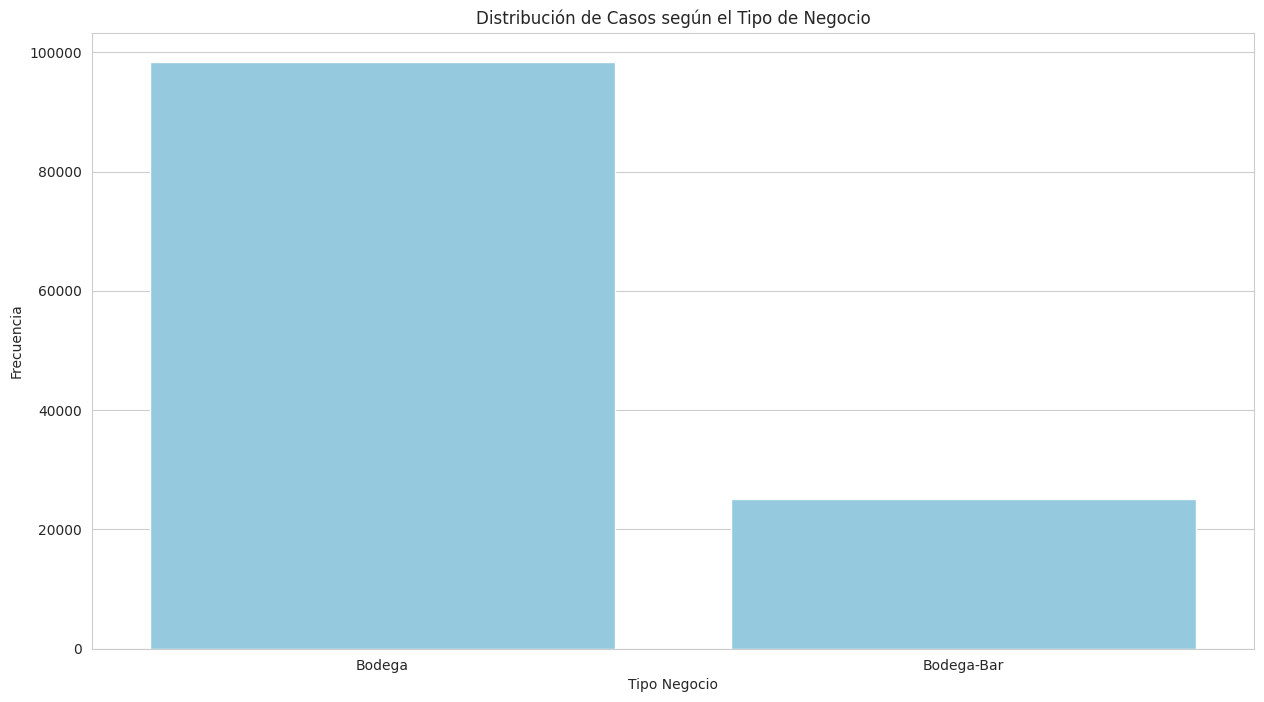

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))

# sns.countplot(df['Tipo Negocio'], bins=50, color='skyblue', kde=True)
sns.countplot(x="Tipo Negocio", data=df, color="skyblue")

plt.title("Distribución de Casos según el Tipo de Negocio")
plt.xlabel('Tipo Negocio')
plt.ylabel('Frecuencia')

plt.show()

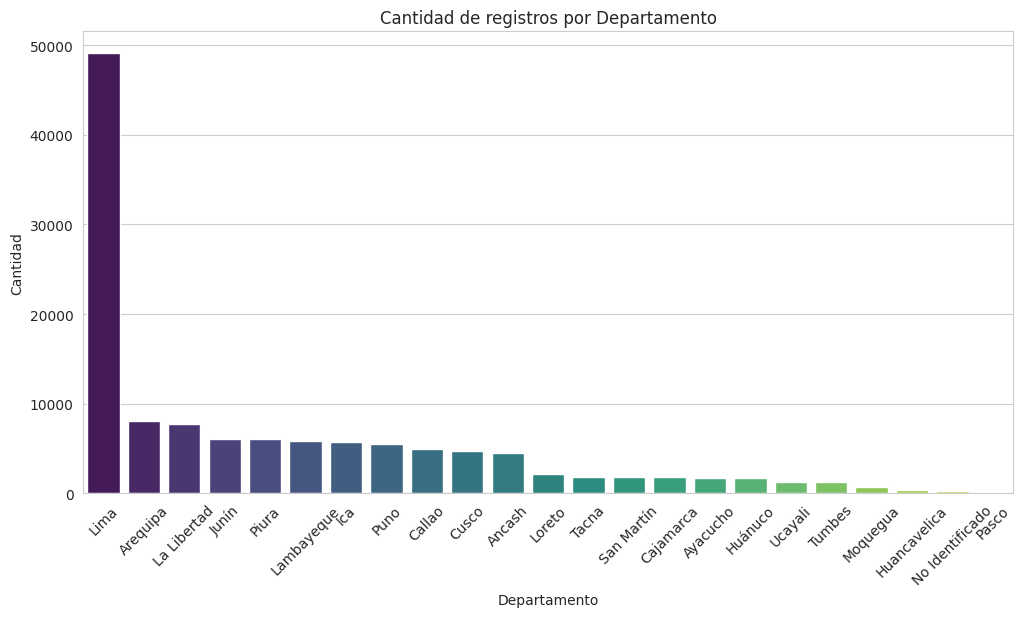

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(x="Departamento", data=df, order=df["Departamento"].value_counts().index, palette="viridis")

plt.title("Cantidad de registros por Departamento")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

Podemos apreciar que el departamento de Lima cuenta con la mayor pante de los puntos de venta existentes(objetivo de nuestros distribuidores)

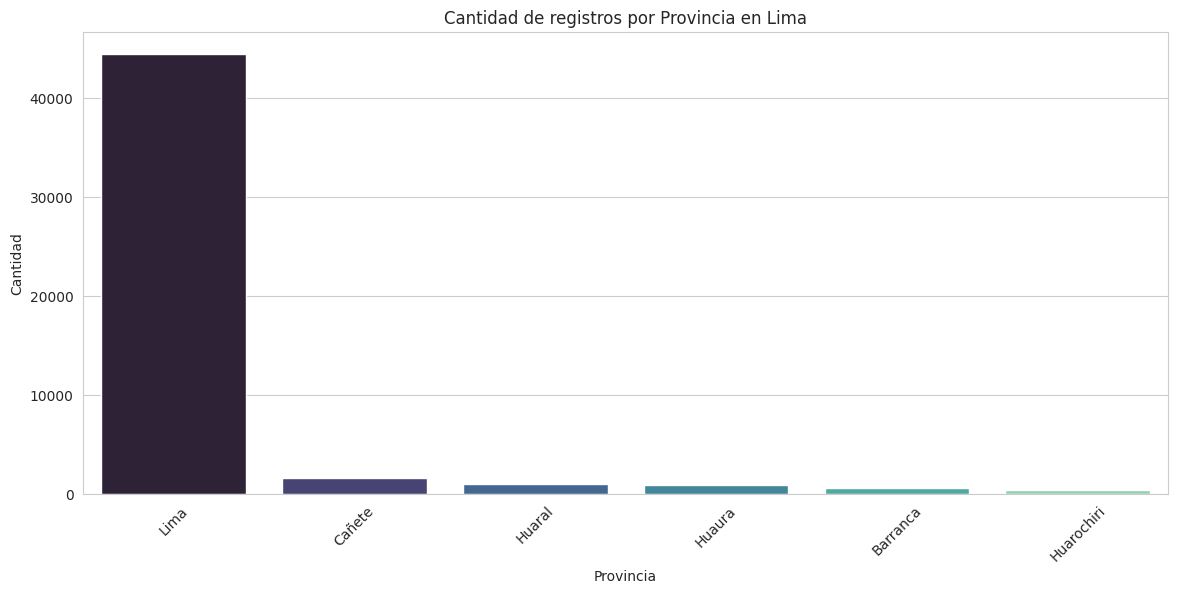

In [95]:
plt.figure(figsize=(14,6))
sns.countplot(x="Provincia", data=df[df["Departamento"]=="Lima"],
              order=df[df["Departamento"]=="Lima"]["Provincia"].value_counts().index,
              palette="mako")

plt.title("Cantidad de registros por Provincia en Lima")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

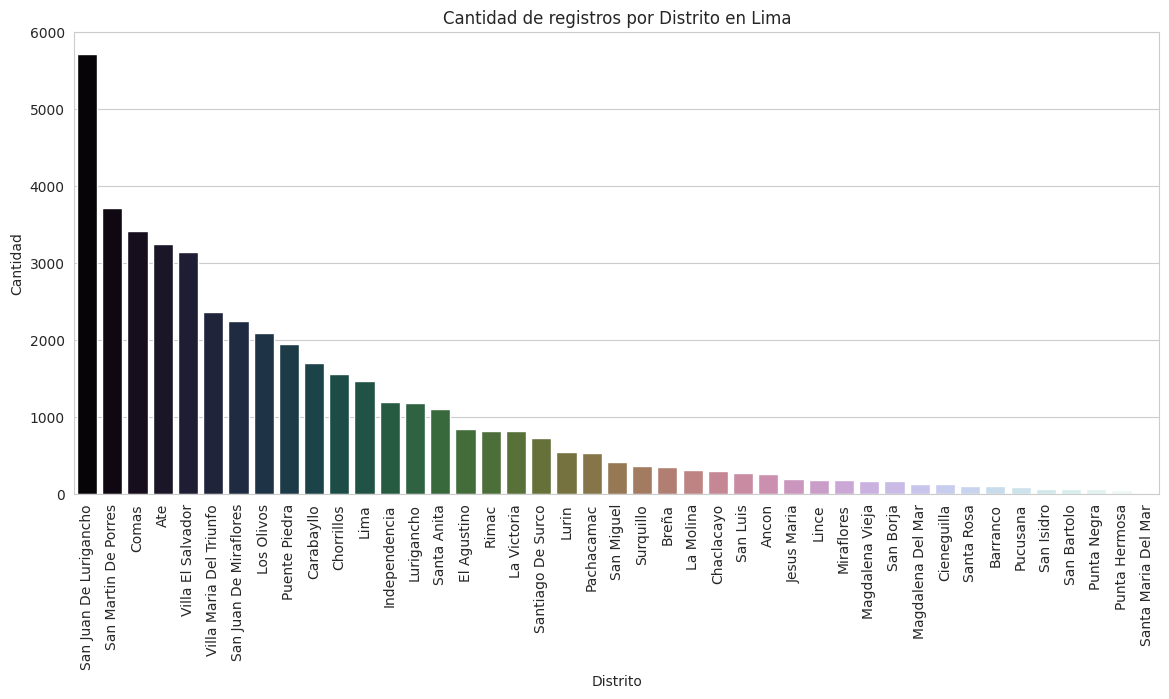

In [96]:
plt.figure(figsize=(14,6))
sns.countplot(x="Distrito", data=df[df["Provincia"]=="Lima"],
              order=df[df["Provincia"]=="Lima"]["Distrito"].value_counts().index,
              palette="cubehelix")

plt.title("Cantidad de registros por Distrito en Lima")
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.show()

Los 5 distritos con mayor numero de puntos de venta son San Martin de Porres, San Martin de Porres, Comas, Ate y villa el salvador.

## Paso 3: Modificar
- En esta fase, abordaremos las anomalías de los datos y los prepararemos para el modelado. Específicamente, haremos:

In [82]:
df = df.dropna(subset=["Latitud", "Longitud"])

In [76]:
data_estandarizado = df.copy()
data_estandarizado["Latitud"] = pd.to_numeric(data_estandarizado["Latitud"], errors="coerce")
data_estandarizado["Longitud"] = pd.to_numeric(data_estandarizado["Longitud"], errors="coerce")

In [78]:
data_filtrado = data_estandarizado.drop_duplicates(subset=["Latitud", "Longitud"], keep="first")

In [79]:
data_filtrado = data_filtrado[(data_filtrado["Latitud"].between(-90, 90)) & (data_filtrado["Longitud"].between(-180, 180))]

In [80]:
print(data_filtrado[["Latitud", "Longitud"]].describe())

             Latitud       Longitud
count  123018.000000  123018.000000
mean      -11.337457     -76.274097
std         3.219786       2.751541
min       -18.077393     -81.310100
25%       -12.300586     -77.139386
50%       -12.011862     -76.987526
75%        -9.136142     -75.245117
max        -3.260437     -69.202559


### Visualización puntos de venta

<Axes: >

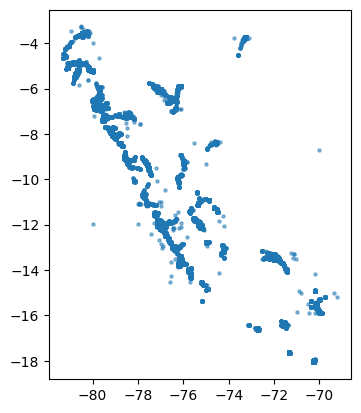

In [73]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(data_filtrado, geometry=gpd.points_from_xy(data_filtrado.Longitud, data_filtrado.Latitud))
gdf.plot(markersize=5, alpha=0.5)

In [100]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[data_filtrado["Latitud"].mean(), data_filtrado["Longitud"].mean()], zoom_start=11)

heat_data = list(zip(data_filtrado["Latitud"], data_filtrado["Longitud"]))
HeatMap(heat_data, radius=12).add_to(m)

In [101]:
m

Visualizando el mapa de calor podemos apreciar la densidad de distribucion de estos puntos de venta, donde Lima y Lima Metropolitana albergan la mayor densidad de puntos de venta.